In [2]:
# Importing Libraries
from data_loader import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

df = load_data()
df_temp = df.copy()
df_temp['payment_method'].fillna('Unknown', inplace=True)

Successful connection to the database.
US data successfully loaded into a Pandas DataFrame.
Number of rows loaded: 1221
Database connection closed.


d:\DATA ANALITICS\Projects_Data_Analyst\PAYMENT_CARD_FRAUD_DETECTION_2025(SQL,PYTHON,POWER_BI)\notebooks\data_loader.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usa = pd.read_sql_query(query, conn)
C:\Users\darie\AppData\Local\Temp\ipykernel_8224\2785862905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['payment_method'].fillna('Unknown', inplace=T

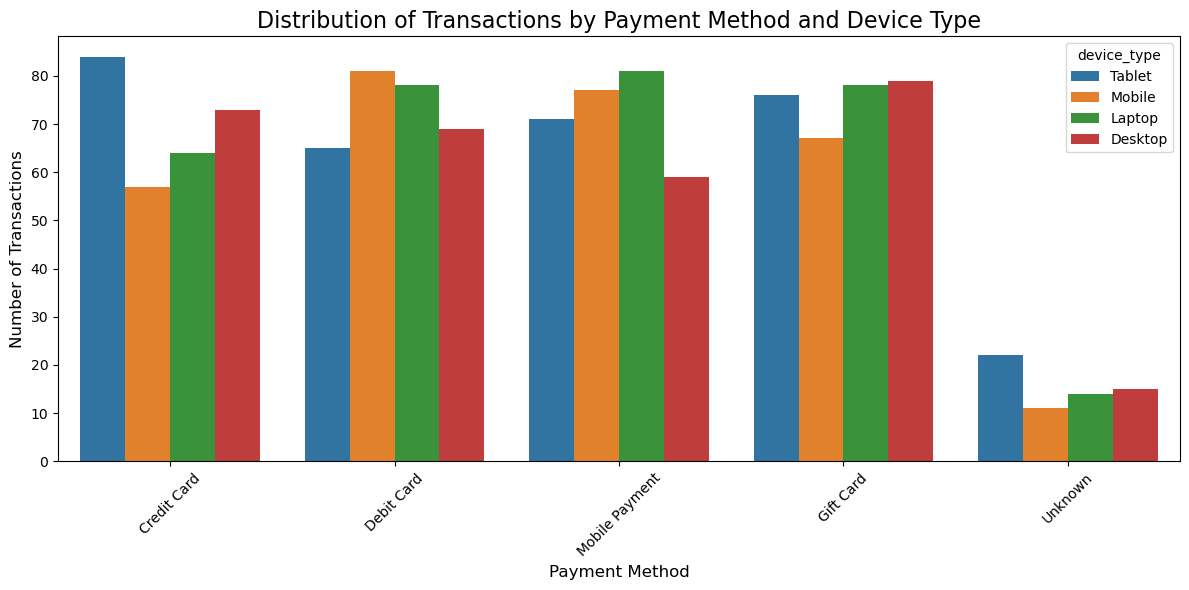

In [4]:
# --- Data Preparation ---
# Load the dataset (assuming 'df_temp' is the raw dataframe)
# The next line groups the data by payment method and device type
# to count the number of transactions for each combination.
# The result is then sorted to easily identify the most common pairs.
payment_device_distribution = df_temp.groupby(['payment_method', 'device_type'])['transaction_id'].count().reset_index(name='transaction_count').sort_values(by='transaction_count', ascending=False)

# --- Data Visualization ---
# Set the figure size for a clear and readable plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the distribution
# 'hue' is used to show the breakdown by device type within each payment method
sns.barplot(data=payment_device_distribution, x='payment_method', y='transaction_count', hue='device_type')

# Add descriptive titles and labels for better readability and context
plt.title('Distribution of Transactions by Payment Method and Device Type', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Rotate x-axis labels to prevent overlap, making them easier to read
plt.xticks(rotation=45)

# Adjust plot layout to ensure all elements fit well
plt.tight_layout()

# Display the final plot
plt.show()